In [ ]:
 import sys  
 import numpy
 import pandas
 import matplotlib
 import seaborn
 import scipy
 import sklearn

 
 
 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

Saving creditcard.csv to creditcard (2).csv


In [ ]:
df = pd.read_csv('creditcard.csv')
df.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0


In [ ]:
data = pd.read_csv('creditcard.csv')

In [ ]:
print(data.columns) #exlore the data set


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
print(data.shape)

(12252, 31)


In [ ]:
print(data.describe())

               Time            V1  ...        Amount         Class
count  12252.000000  12252.000000  ...  12252.000000  12252.000000
mean   47670.100392     -0.258849  ...     95.510625      0.002040
std    19340.250722      1.825762  ...    265.597391      0.045127
min        0.000000    -28.344757  ...      0.000000      0.000000
25%    35694.500000     -1.006350  ...      6.990000      0.000000
50%    49302.500000     -0.265635  ...     25.375000      0.000000
75%    63588.500000      1.153097  ...     86.000000      0.000000
max    76590.000000      1.656708  ...  11898.090000      1.000000

[8 rows x 31 columns]


In [ ]:
data = data.sample(frac = 0.1, random_state=1)

print(data.shape)

(12252, 31)


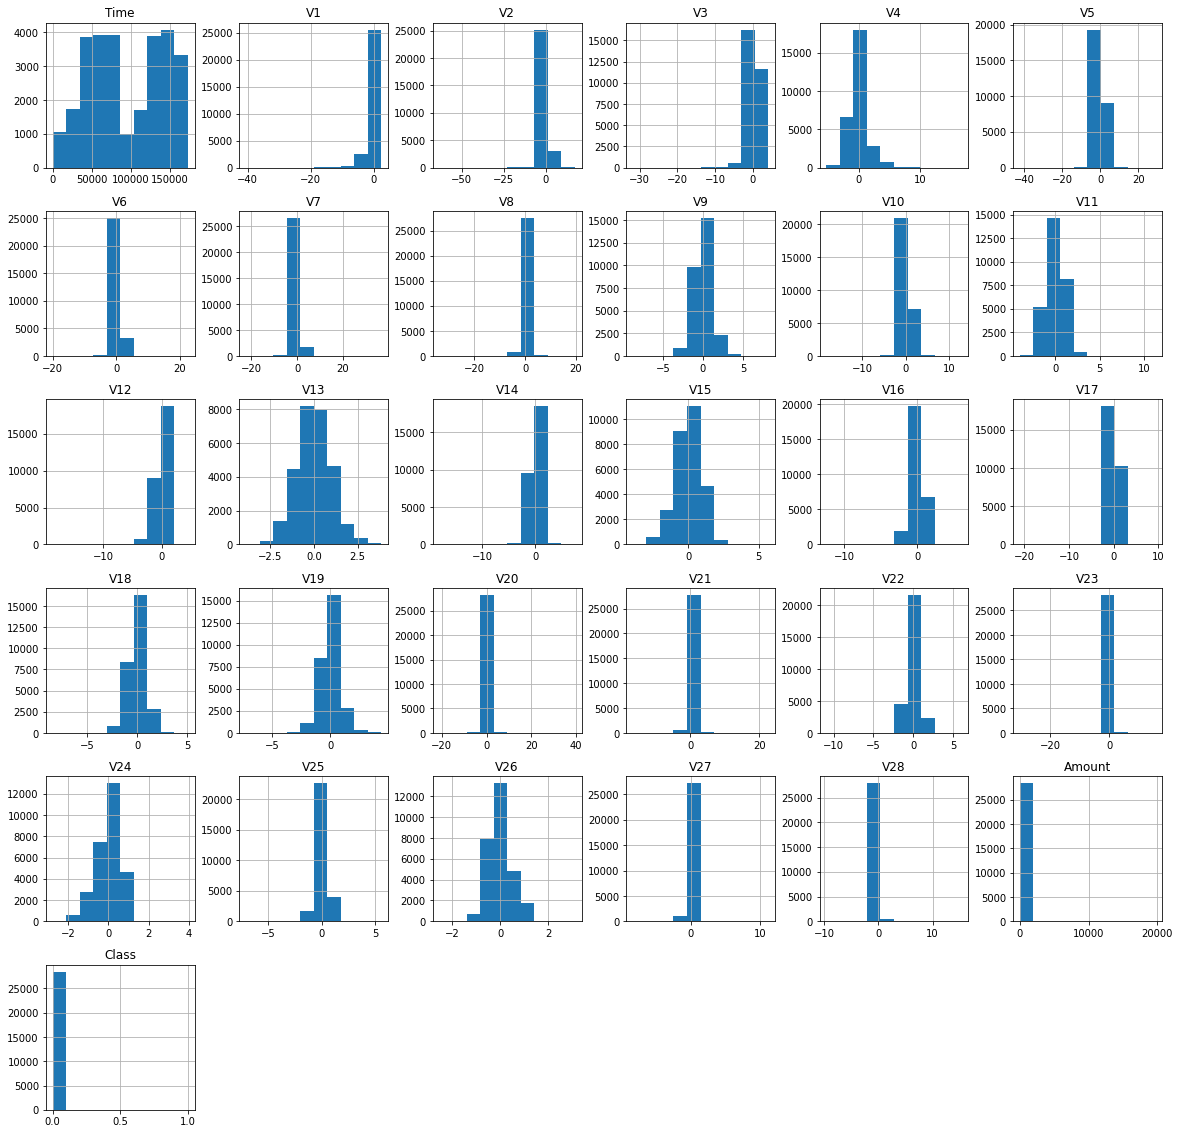

In [ ]:
data.hist(figsize = (20,20))
plt.show()

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('fraud cases: {}'.format(len(fraud)))
print('valid cases: {}'.format(len(valid)))


0.0017234102419808666
fraud cases: 49
valid cases: 28432


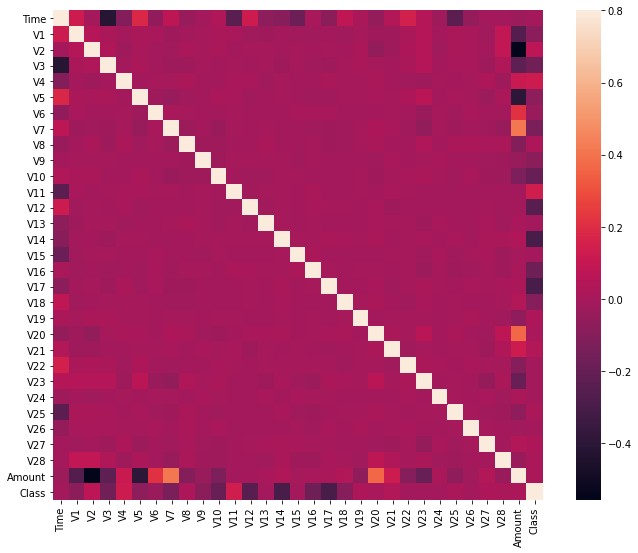

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [ ]:
columns = data.columns.tolist()

columns = [c for c in columns if c not in ['Class']]

target = 'Class'

x = data[columns]
y = data[target]

print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(x),contamination = outlier_fraction,random_state = state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors = 20, contamination = outlier_fraction)

}

In [ ]:
n_outliers = len (fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):

  if clf_name == "Local Outlier Factor":
    y_pred = clf.fit_predict(x)
    scores_pred = clf.negative_outlier_factor_
  else:
    clf.fit(x)
    scores_pred = clf.decision_function(x)
    y_pred = clf.predict(x)


  y_pred[y_pred == 1] = 0
  y_pred[y_pred == -1] = 1

  n_errors = (y_pred != y).sum()

  print('{}:{}'.format(clf_name, n_errors))
  print(accuracy_score(y,y_pred))
  print(classification_report(y,y_pred))


  


Isolation Forest:71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

